## There is no denying that the climate is changing and, with the changing climate natural disasters become worse and cause more damage.  Climate change is directly correlated to environmental security, regional stability, maritime security, humanitarian issues, and overall global security.  Droughts, floods, hurricanes damage infrastructure, interrupt the supply chain, add to food instability, and adding to the deterioration of the natural habitats of thousands of species. This is storm data from NOAA. The first file is data from 2006 and will be used as my baseline for this analysis.  This analysis, spread over the course of five years, is meant to highlight the climate crisis and offer my perspective on consequences, new patterns, and possible solutions.  While I may not be an expert on climate or anything relating to the weather, I do understand the damage that can be caused if climate change is not taken as a serious threat.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_csv('StormEvents_details-database_v1.0_d2019_c20210604.csv')
df.head(1)

C:\Users\willi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_TITLE,EPISODE_NARRATIVE,EVENT_NARRATIVE,LAST_MOD_DATE,LAST_MOD_TIME,LAST_CERT_DATE,LAST_CERT_TIME,LAST_MOD,LAST_CERT,ADDCORR_FLG,ADDCORR_DATE,DATA_SOURCE
0,201905,9,1554,201905,9,1830,137295,824116,TEXAS,48,2019,May,Flash Flood,C,29,BEXAR,EWX,09-MAY-19 15:54:00,CST-6,09-MAY-19 18:30:00,0,0,0,0,0.00K,0.00K,Law Enforcement,NaN,NaN,Heavy Rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,N,LEON SPGS,7.0,NNE,SAN GERONIMO,29.7898,-98.6406,29.7158,-98.7744,"May 9, 2019",Thunderstorms developed along a cold front as ...,Thunderstorms produced heavy rain that led to ...,99999999,9999,20191031,1335,NaN,10/31/2019 13:35:50,1.0,20191116.0,CSV


# The first thing I notice right away is the most common start date is about a month earlier in 2018 than 2006 and the same with the end date.  

In [2]:
df['BEGIN_DATE_TIME'].describe()

count                  67654
unique                 36648
top       01-DEC-19 00:00:00
freq                     277
Name: BEGIN_DATE_TIME, dtype: object

In [3]:
begin_dates = df[df['BEGIN_DATE_TIME'] == '01-DEC-19 00:00:00']

## The most common begin date in 2019 just a year later, is 6 months later than in 2018 and there are more unique dates within the begin dates and there are more total dates.  In 2019, in the begin dates, there are no thunderstorm winds and most storm categories have decreased.  However, categories related to winter weather are present that are not in 2018.  More states with storms in the begin dates seem to be farther up north than in 2018. 

## The end dates in 2019 are in October while the most common end dates in 2018 were in June.  The storms per state were also more random and doesn't seem to follow any pattern or concentrate in any particular region. The differences in the end dates between 2018 and 2019 might also explain the differences in the type of storm. 

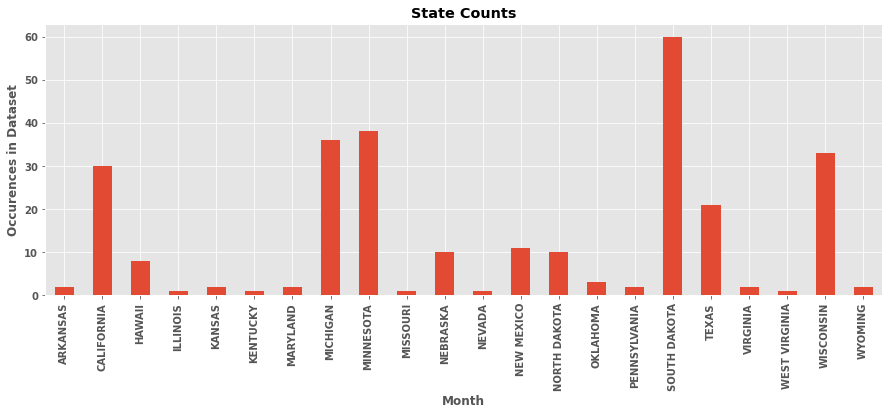

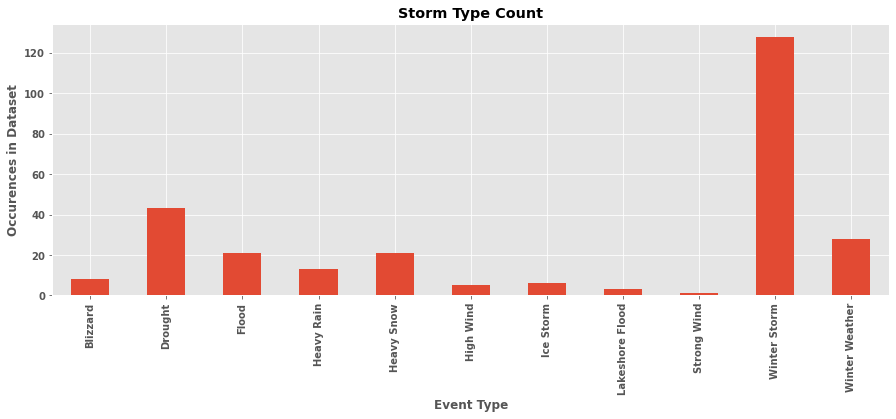

In [4]:
plt.figure(figsize=(15,5))
begin_dates.groupby('STATE')['STATE'].count().plot(kind='bar')
plt.title('State Counts', fontweight='bold')
plt.ylabel('Occurences in Dataset', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Month", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()
plt.figure(figsize=(15,5))
begin_dates.groupby('EVENT_TYPE')['EVENT_TYPE'].count().plot(kind='bar')
plt.title('Storm Type Count', fontweight='bold')
plt.ylabel('Occurences in Dataset', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Event Type", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

In [5]:
df['END_DATE_TIME'].describe()

count                  67654
unique                 35744
top       31-OCT-19 23:59:00
freq                     304
Name: END_DATE_TIME, dtype: object

In [6]:
end_dates = df[df['END_DATE_TIME'] == '31-OCT-19 23:59:00']

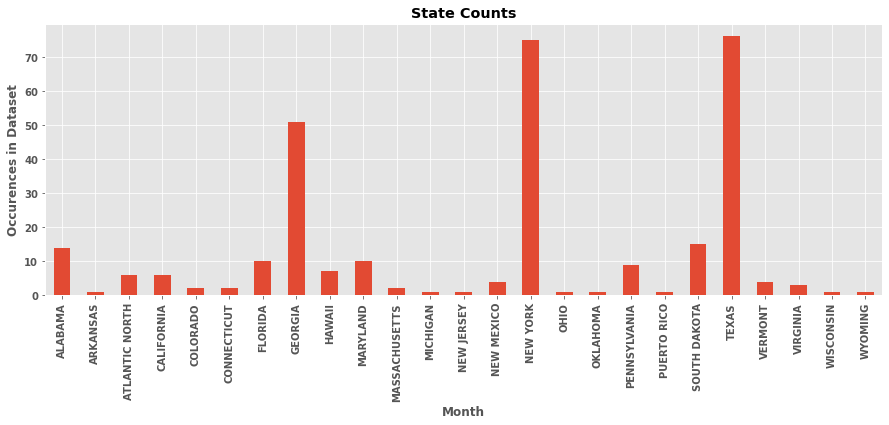

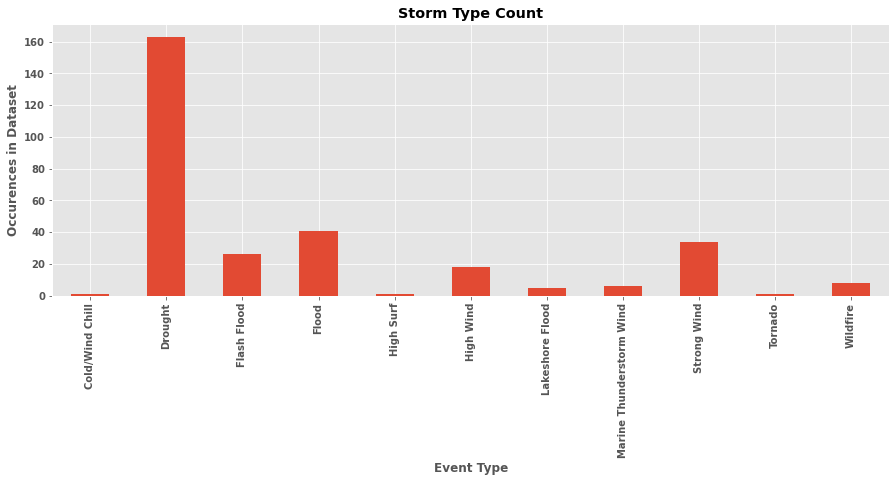

In [7]:
plt.figure(figsize=(15,5))
end_dates.groupby('STATE')['STATE'].count().plot(kind='bar')
plt.title('State Counts', fontweight='bold')
plt.ylabel('Occurences in Dataset', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Month", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()
plt.figure(figsize=(15,5))
end_dates.groupby('EVENT_TYPE')['EVENT_TYPE'].count().plot(kind='bar')
plt.title('Storm Type Count', fontweight='bold')
plt.ylabel('Occurences in Dataset', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Event Type", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

In [8]:
df.describe()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE_FIPS,YEAR,CZ_FIPS,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,MAGNITUDE,CATEGORY,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_FIPS,BEGIN_RANGE,END_RANGE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,LAST_MOD_DATE,LAST_MOD_TIME,LAST_CERT_DATE,LAST_CERT_TIME,ADDCORR_FLG,ADDCORR_DATE
count,67654.000000,67654.000000,67654.000000,67654.000000,67654.000000,67654.000000,67654.000000,67654.000000,67654.000000,67654.0,67654.000000,67654.000000,67654.000000,67654.000000,67654.000000,35659.000000,10.000000,1732.000000,1732.000000,215.000000,43562.000000,43562.000000,43562.000000,43562.000000,43562.000000,43562.000000,6.765400e+04,67654.000000,6.765400e+04,67654.000000,18860.000000,1.886000e+04
mean,201905.942561,16.212463,1298.516584,201905.942561,17.189228,1430.593269,138421.638469,832053.874287,33.160227,2019.0,106.754102,0.018269,0.007553,0.006252,0.002395,38.730713,1.300000,3.035982,212.620427,108.125581,2.487122,2.509412,38.062193,-90.361329,38.059588,-90.352309,4.927373e+07,4509.123393,2.019301e+07,1318.566944,1.109173,2.019760e+07
std,3.018145,8.906749,654.541704,3.018145,8.859233,611.125580,3416.826451,21346.182317,18.870669,0.0,136.555111,0.846167,0.452349,0.129830,0.057492,22.893825,0.483046,4.034342,312.524302,82.736933,4.548606,4.571194,4.906444,11.741440,4.905473,11.737998,3.840889e+07,4180.166692,4.269841e+03,387.692669,0.311864,6.539216e+03
min,201901.000000,1.000000,0.000000,201901.000000,1.000000,0.000000,132253.000000,791304.000000,1.000000,2019.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,1.000000,0.010000,1.000000,1.000000,0.000000,0.000000,-14.331600,-171.032700,-14.382500,-170.878700,2.019010e+07,0.000000,2.019020e+07,7.000000,1.000000,2.019052e+07
25%,201904.000000,9.000000,840.000000,201904.000000,10.000000,1030.000000,135532.000000,813943.250000,19.000000,2019.0,25.000000,0.000000,0.000000,0.000000,0.000000,2.750000,1.000000,0.487500,50.000000,47.000000,1.000000,1.000000,35.130000,-97.433550,35.130000,-97.412925,2.019072e+07,1235.000000,2.019063e+07,1037.000000,1.000000,2.019102e+07
50%,201906.000000,17.000000,1500.000000,201906.000000,18.000000,1548.000000,138133.000000,832168.500000,31.000000,2019.0,65.000000,0.000000,0.000000,0.000000,0.000000,50.000000,1.000000,1.500000,100.000000,99.000000,1.000000,1.000000,38.600000,-89.889350,38.600000,-89.863250,2.019110e+07,1820.000000,2.019093e+07,1322.000000,1.000000,2.020012e+07
75%,201908.000000,23.000000,1800.000000,201908.000000,24.000000,1854.000000,141356.750000,849979.750000,46.000000,2019.0,121.000000,0.000000,0.000000,0.000000,0.000000,52.000000,1.750000,4.090000,250.000000,143.000000,3.000000,3.000000,41.290000,-81.049850,41.285100,-81.040000,1.000000e+08,9999.000000,2.019122e+07,1556.000000,1.000000,2.020042e+07
max,201912.000000,31.000000,2359.000000,201912.000000,31.000000,2359.000000,154858.000000,933258.000000,99.000000,2019.0,856.000000,166.000000,71.000000,23.000000,3.000000,143.000000,2.000000,32.160000,2700.000000,401.000000,152.000000,152.000000,66.838500,-64.715100,66.832900,-64.715100,1.000000e+08,9999.000000,2.021023e+07,2359.000000,2.000000,2.021050e+07


In [9]:
begin_dates.describe()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE_FIPS,YEAR,CZ_FIPS,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,MAGNITUDE,CATEGORY,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_FIPS,BEGIN_RANGE,END_RANGE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,LAST_MOD_DATE,LAST_MOD_TIME,LAST_CERT_DATE,LAST_CERT_TIME,ADDCORR_FLG,ADDCORR_DATE
count,277.0,277.0,277.0,277.0,277.000000,277.000000,277.000000,277.000000,277.000000,277.0,277.000000,277.0,277.000000,277.0,277.000000,6.000000,0.0,0.0,0.0,0.0,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,2.770000e+02,277.000000,2.770000e+02,277.000000,22.000000,2.200000e+01
mean,201912.0,1.0,0.0,201912.0,7.202166,1420.068592,144162.039711,865763.833935,34.617329,2019.0,69.007220,0.0,0.039711,0.0,0.003610,47.666667,NaN,NaN,NaN,NaN,4.382353,4.558824,40.817162,-104.597371,40.775424,-104.569035,4.958453e+07,4603.584838,2.020025e+07,1327.032491,1.045455,2.020146e+07
std,0.0,0.0,0.0,0.0,11.949877,701.861040,652.585056,4006.699876,15.106079,0.0,90.363437,0.0,0.603622,0.0,0.060084,7.366591,NaN,NaN,NaN,NaN,4.278308,3.986273,3.178483,12.731524,3.136644,12.747016,3.855939e+07,4151.826593,1.006777e+02,327.537346,0.213201,2.836495e+03
min,201912.0,1.0,0.0,201912.0,1.000000,0.000000,143077.000000,858720.000000,5.000000,2019.0,1.000000,0.0,0.000000,0.0,0.000000,35.000000,NaN,NaN,NaN,NaN,0.000000,1.000000,35.275800,-120.590000,35.260800,-120.590000,2.019121e+07,1.000000,2.020012e+07,207.000000,1.000000,2.020042e+07
25%,201912.0,1.0,0.0,201912.0,1.000000,900.000000,143406.000000,860777.000000,26.000000,2019.0,17.000000,0.0,0.000000,0.0,0.000000,44.750000,NaN,NaN,NaN,NaN,1.250000,2.000000,38.400000,-119.792500,38.405850,-119.792500,2.020022e+07,1253.000000,2.020022e+07,1137.000000,1.000000,2.020062e+07
50%,201912.0,1.0,0.0,201912.0,1.000000,1200.000000,144241.000000,865686.000000,35.000000,2019.0,38.000000,0.0,0.000000,0.0,0.000000,50.500000,NaN,NaN,NaN,NaN,3.000000,4.000000,39.605000,-98.220000,39.605000,-98.145000,2.020023e+07,2043.000000,2.020023e+07,1228.000000,1.000000,2.020062e+07
75%,201912.0,1.0,0.0,201912.0,2.000000,2300.000000,144709.000000,869393.000000,46.000000,2019.0,73.000000,0.0,0.000000,0.0,0.000000,51.750000,NaN,NaN,NaN,NaN,5.750000,6.000000,43.762700,-97.708500,43.477500,-97.665125,1.000000e+08,9999.000000,2.020023e+07,1652.000000,1.000000,2.020062e+07
max,201912.0,1.0,0.0,201912.0,31.000000,2359.000000,145491.000000,873652.000000,56.000000,2019.0,530.000000,0.0,10.000000,0.0,1.000000,55.000000,NaN,NaN,NaN,NaN,18.000000,18.000000,45.930000,-86.980000,45.930000,-86.981100,1.000000e+08,9999.000000,2.020093e+07,2002.000000,2.000000,2.021022e+07


In [10]:
end_dates.describe()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE_FIPS,YEAR,CZ_FIPS,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,MAGNITUDE,CATEGORY,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_FIPS,BEGIN_RANGE,END_RANGE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,LAST_MOD_DATE,LAST_MOD_TIME,LAST_CERT_DATE,LAST_CERT_TIME,ADDCORR_FLG,ADDCORR_DATE
count,304.0,304.000000,304.000000,304.0,304.0,304.0,304.000000,304.000000,304.000000,304.0,304.000000,304.000000,304.0,304.000000,304.0,58.000000,0.0,1.00,1.0,0.0,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,3.040000e+02,304.000000,3.040000e+02,304.000000,96.000000,9.600000e+01
mean,201910.0,14.375000,799.203947,201910.0,31.0,2359.0,143384.236842,860712.680921,33.069079,2019.0,92.532895,0.023026,0.0,0.003289,0.0,46.706897,NaN,4.85,200.0,NaN,1.986486,2.013514,41.881422,-80.400201,41.857751,-80.380000,4.854630e+07,4458.871711,2.019424e+07,1265.967105,1.052083,2.020094e+07
std,0.0,14.089442,991.999546,0.0,0.0,0.0,327.129807,1967.554465,17.868935,0.0,104.802528,0.286315,0.0,0.057354,0.0,4.000038,NaN,NaN,NaN,NaN,2.057351,1.996526,2.346324,9.348526,2.325467,9.328684,3.825744e+07,4134.208964,4.258549e+03,496.451067,0.223361,2.587770e+03
min,201910.0,1.000000,0.000000,201910.0,31.0,2359.0,142367.000000,854735.000000,1.000000,2019.0,1.000000,0.000000,0.0,0.000000,0.0,34.000000,NaN,4.85,200.0,NaN,0.000000,0.000000,35.273200,-98.563700,35.260000,-98.491600,2.019110e+07,144.000000,2.019112e+07,18.000000,1.000000,2.020022e+07
25%,201910.0,1.000000,0.000000,201910.0,31.0,2359.0,143175.000000,859850.750000,13.000000,2019.0,27.000000,0.000000,0.0,0.000000,0.0,45.000000,NaN,4.85,200.0,NaN,1.000000,1.000000,39.540900,-78.598100,39.538500,-78.590075,2.019123e+07,1516.000000,2.019122e+07,836.000000,1.000000,2.020022e+07
50%,201910.0,8.000000,0.000000,201910.0,31.0,2359.0,143506.000000,861128.500000,36.000000,2019.0,54.000000,0.000000,0.0,0.000000,0.0,45.000000,NaN,4.85,200.0,NaN,1.000000,1.000000,43.035000,-75.825000,43.022000,-75.825000,2.020012e+07,1527.000000,2.019123e+07,1220.000000,1.000000,2.020022e+07
75%,201910.0,31.000000,2000.000000,201910.0,31.0,2359.0,143643.000000,861948.250000,48.000000,2019.0,114.250000,0.000000,0.0,0.000000,0.0,52.000000,NaN,4.85,200.0,NaN,2.750000,3.000000,43.638875,-74.962575,43.533175,-74.962575,1.000000e+08,9999.000000,2.020013e+07,1629.000000,1.000000,2.020022e+07
max,201910.0,31.000000,2355.000000,201910.0,31.0,2359.0,143768.000000,866383.000000,99.000000,2019.0,550.000000,4.000000,0.0,1.000000,0.0,52.000000,NaN,4.85,200.0,NaN,11.000000,8.000000,45.930000,-73.207100,45.930000,-73.222500,1.000000e+08,9999.000000,2.020122e+07,2342.000000,2.000000,2.021012e+07


## Analysis of whole dataframe

## In 2019 storms went up in states.  Arizon, California, Illinois, Kentucky, Minnesota, New York, Texas, and Virginia being most noticeable.  In 2019, more states had direct deaths but it looks like some states in 2018 had a higher number of deaths.  This might be because those states in 2018 had storms more frequently or the storms they did have were outliers and more intense.

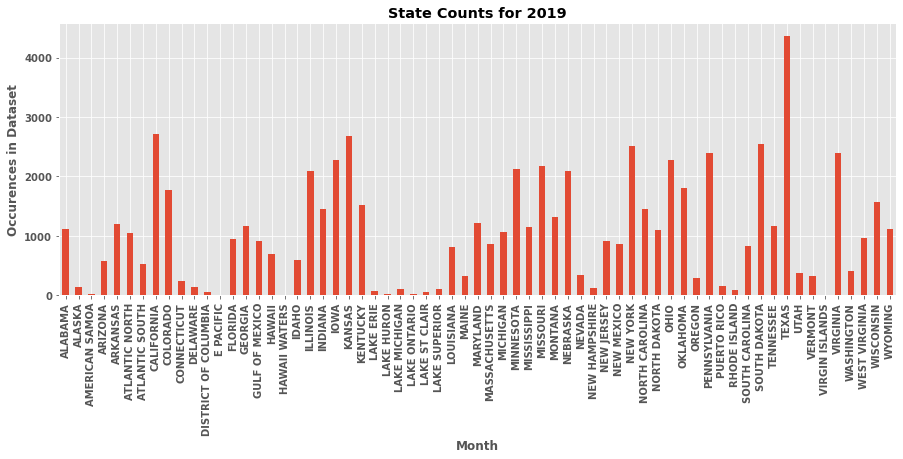

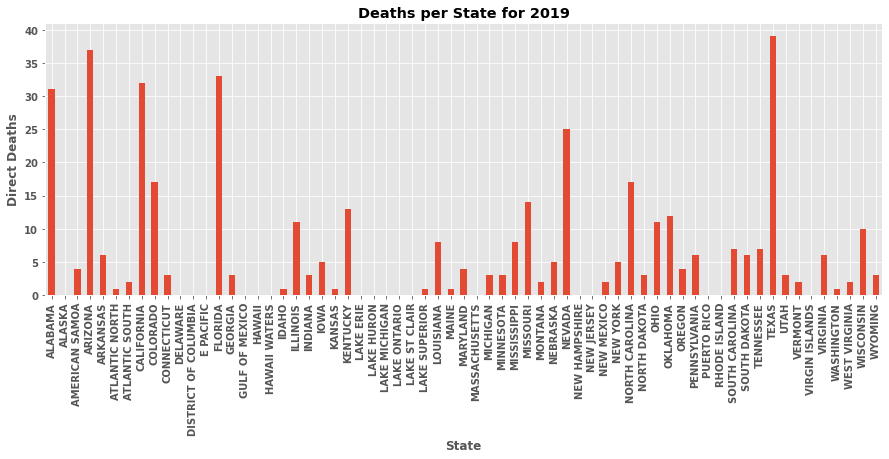

In [11]:
plt.figure(figsize=(15,5))
df.groupby('STATE')['STATE'].count().plot(kind='bar')
plt.title('State Counts for 2019', fontweight='bold')
plt.ylabel('Occurences in Dataset', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Month", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()
plt.figure(figsize=(15,5))
df.groupby('STATE')['DEATHS_DIRECT'].sum().plot(kind='bar')
plt.title('Deaths per State for 2019', fontweight='bold')
plt.ylabel('Direct Deaths', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("State", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

## The months that storms occur seem to stray from the pattern seen in 2018 and lose the bell shape of a normal distribution.  The direct deaths pre month follow the same trend as the direct deaths pre state.

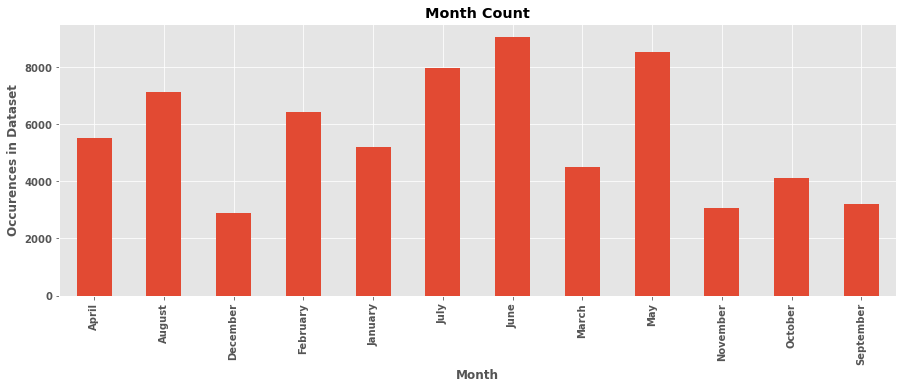

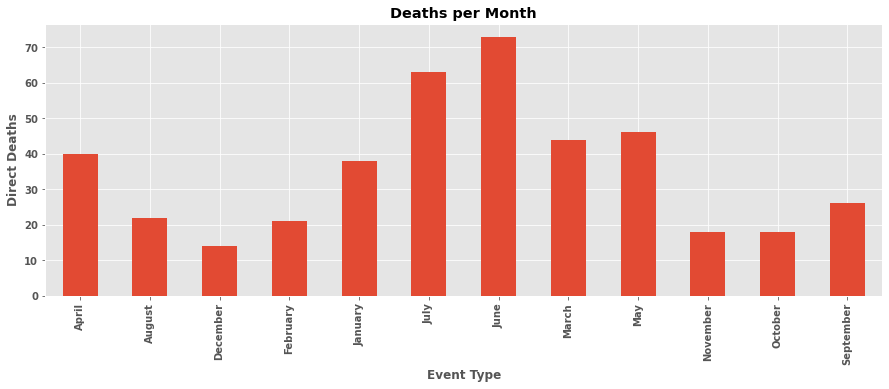

In [12]:
plt.figure(figsize=(15,5))
df.groupby('MONTH_NAME')['MONTH_NAME'].count().plot(kind='bar')
plt.title('Month Count', fontweight='bold')
plt.ylabel('Occurences in Dataset', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Month", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()
plt.figure(figsize=(15,5))
df.groupby('MONTH_NAME')['DEATHS_DIRECT'].sum().plot(kind='bar')
plt.title('Deaths per Month', fontweight='bold')
plt.ylabel('Direct Deaths', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Event Type", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

## Both marine thunderstorm wind and thunderstorm wind increased in 2019.  It also seems like tornados increased by around 1000 or less occurences.  Direct deaths from tornados went up about 20-30 in 2019 and based on the bars in the plots, by looking at the bar height, it's possible that tornados were more intense causing more deaths than in 2018.

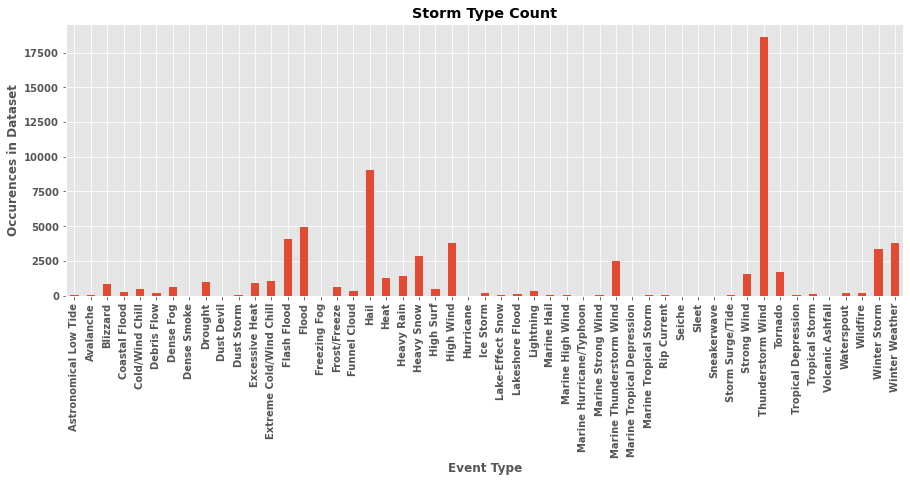

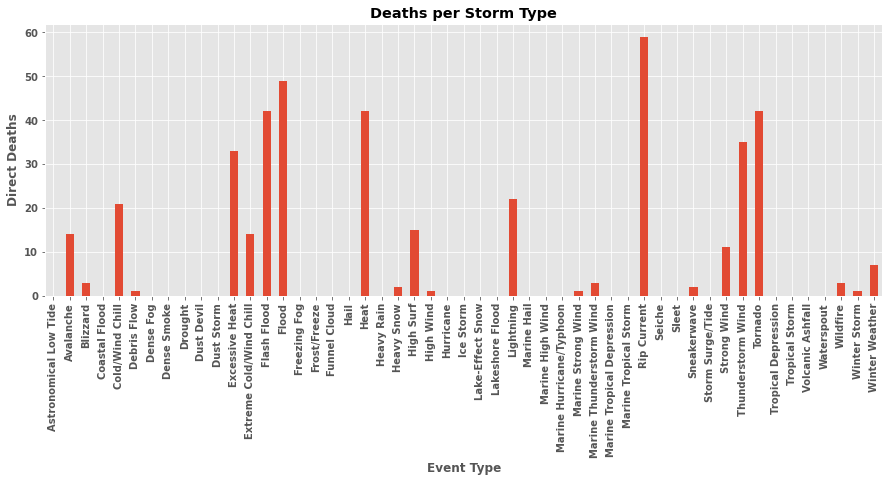

In [13]:
plt.figure(figsize=(15,5))
df.groupby('EVENT_TYPE')['EVENT_TYPE'].count().plot(kind='bar')
plt.title('Storm Type Count', fontweight='bold')
plt.ylabel('Occurences in Dataset', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Event Type", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()
plt.figure(figsize=(15,5))
df.groupby('EVENT_TYPE')['DEATHS_DIRECT'].sum().plot(kind='bar')
plt.title('Deaths per Storm Type', fontweight='bold')
plt.ylabel('Direct Deaths', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Event Type", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

## The range of storms have less variance in 2019 with the same cluster around 10-15 miles.  There is the same distribution in the magnitude of tornados as 2018.

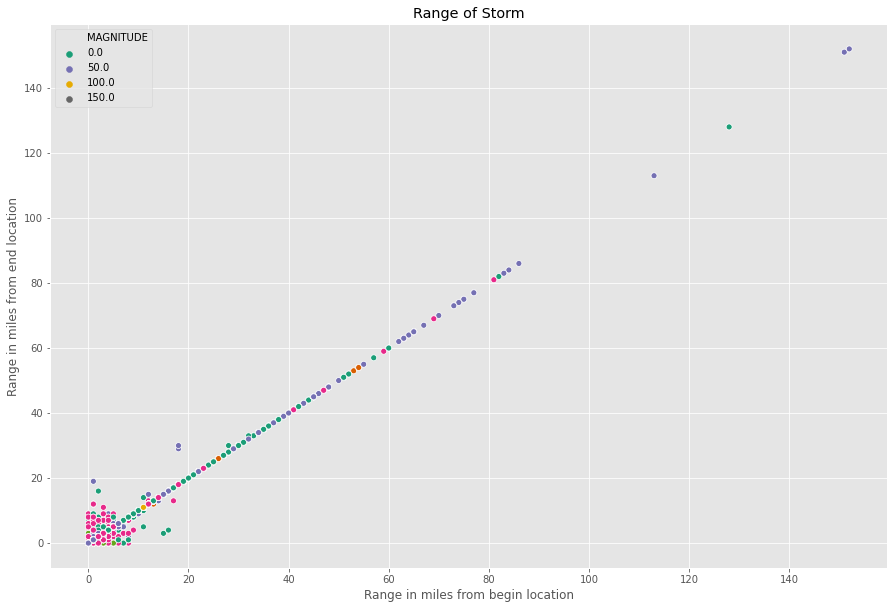

In [14]:
plt.figure(figsize=(15,10))
sns.scatterplot('BEGIN_RANGE', 'END_RANGE', hue='MAGNITUDE', data=df, palette='Dark2')
plt.title('Range of Storm')
plt.ylabel('Range in miles from end location')
plt.xlabel('Range in miles from begin location')
plt.show()

# EF0 – Light Damage (40 – 72 mph)
# EF1 – Moderate Damage (73 – 112 mph)
# EF2 – Significant damage (113 – 157 mph)
# EF3 – Severe Damage (158 – 206 mph)
# EF4 – Devastating Damage (207 – 260 mph)
# EF5 – Incredible Damage (261 – 318 mph)

## There's more varition in the size of a tornado in 2019 than 2018 and more tornados reach a category 3 and 4 in 2019.

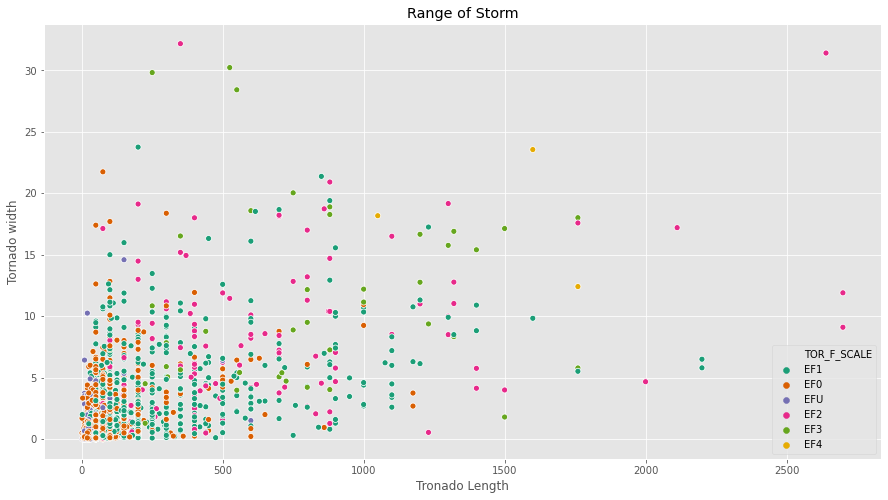

In [15]:
plt.figure(figsize=(15,8))
sns.scatterplot('TOR_WIDTH', 'TOR_LENGTH', hue='TOR_F_SCALE', data=df, palette='Dark2')
plt.title('Range of Storm')
plt.ylabel('Tornado width')
plt.xlabel('Tronado Length')
plt.show()

# EG = Wind Estimated Gust; ES = Estimated Sustained Wind; MS = Measured Sustained Wind;
# MG = Measured Wind Gust

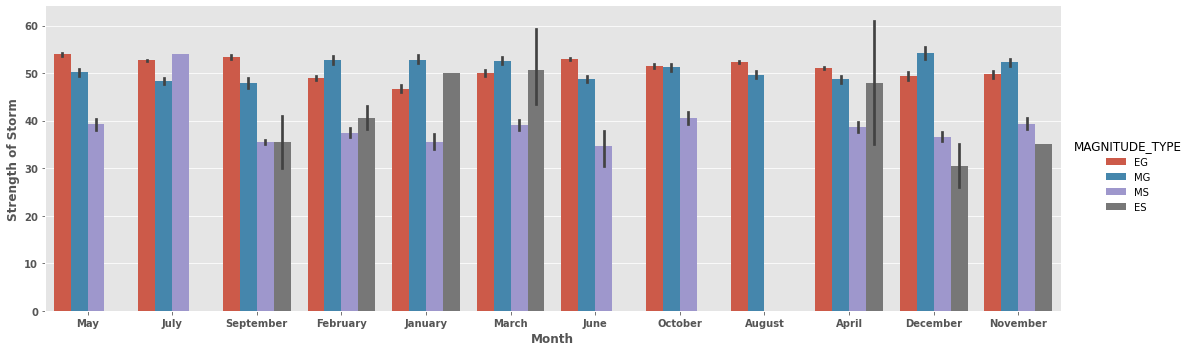

In [16]:
sns.catplot('MONTH_NAME', 'MAGNITUDE', hue='MAGNITUDE_TYPE', data=df,kind='bar', aspect=3)
plt.ylabel('Strength of Storm', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Month", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

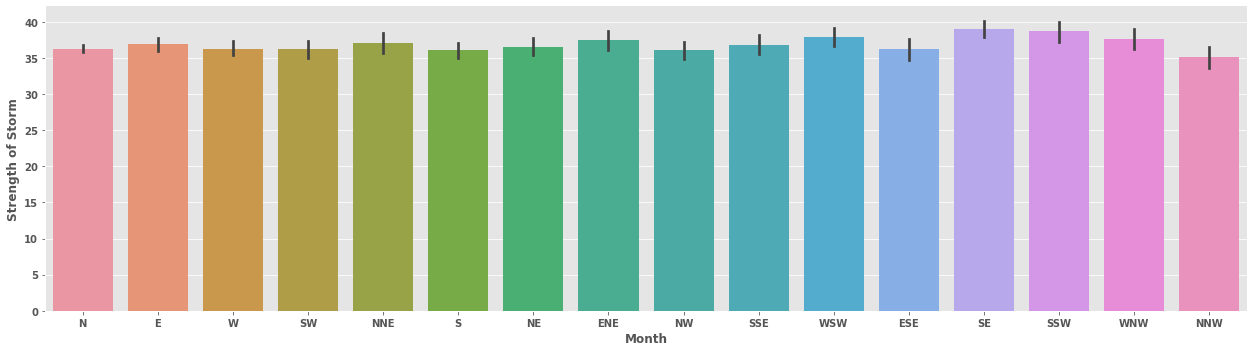

In [17]:
sns.catplot('BEGIN_AZIMUTH', 'MAGNITUDE', data=df,kind='bar', aspect=3.5)
plt.ylabel('Strength of Storm', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Month", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

# Date and time analysis

In [18]:
df['BEGIN_DATE_TIME'] = pd.to_datetime(df['BEGIN_DATE_TIME'])
ts = df.set_index(df['BEGIN_DATE_TIME'])
ts['begin_hour'] = ts['BEGIN_DATE_TIME'].dt.hour
early_hours = ts[ts['begin_hour'] < 9]
late_hours = ts[ts['begin_hour'] > 17]

In [19]:
len(ts)

67654

## The average magnitude per storm increasein 2019 and there's less deviation from that mean.  The outliers do have a higher magnitude than in 2018 and the 25th percentile is higher than in 2018.  I don't know enough about storms and extreme weather to understand the signifigance or lack there of.  To me it shows that storms are becoming more intense as the climate changes.  There seems to be more data starting in early or mid April to October than in 2018.

In [20]:
ts['MAGNITUDE'].describe()

count    35659.000000
mean        38.730713
std         22.893825
min          0.250000
25%          2.750000
50%         50.000000
75%         52.000000
max        143.000000
Name: MAGNITUDE, dtype: float64

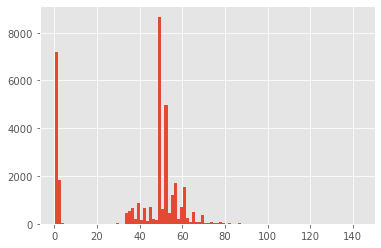

In [21]:
plt.hist(ts['MAGNITUDE'], bins=100)
plt.show()

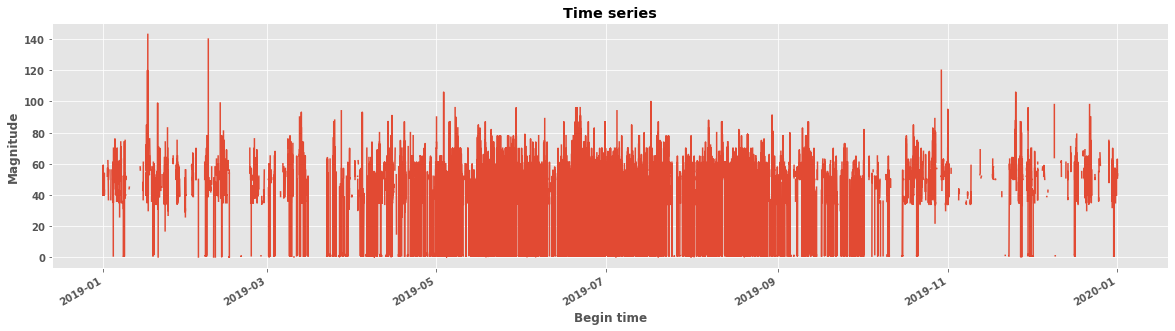

In [22]:
plt.figure(figsize=(20,5))
ts['MAGNITUDE'].plot()
plt.title('Time series', fontweight='bold')
plt.ylabel('Magnitude', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Begin time", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

## The begin hours have the same distribution as in 2018.

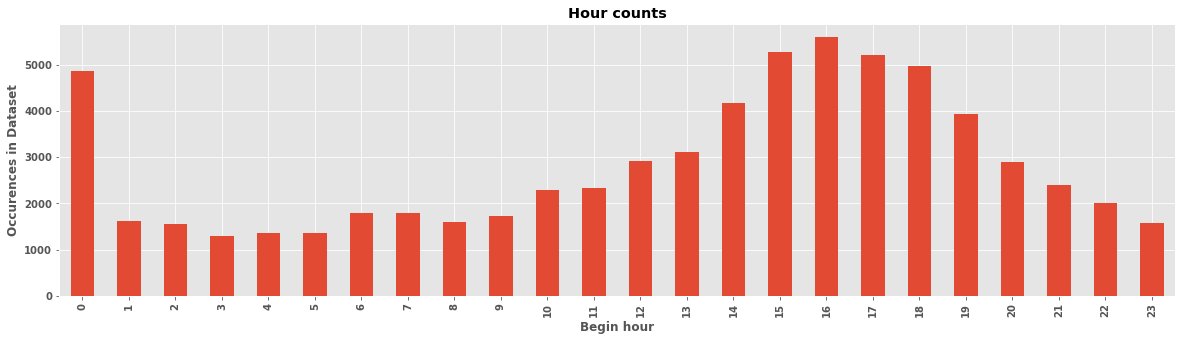

In [23]:
plt.figure(figsize=(20,5))
ts.groupby('begin_hour')['begin_hour'].count().plot(kind='bar')
plt.title('Hour counts', fontweight='bold')
plt.ylabel('Occurences in Dataset', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Begin hour", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

## The storm type that went up most noticably in the early hours since 2018 was flood and thunderstorm wind for 2019.  In the later hours, thunderstorm wind also went up and hail.

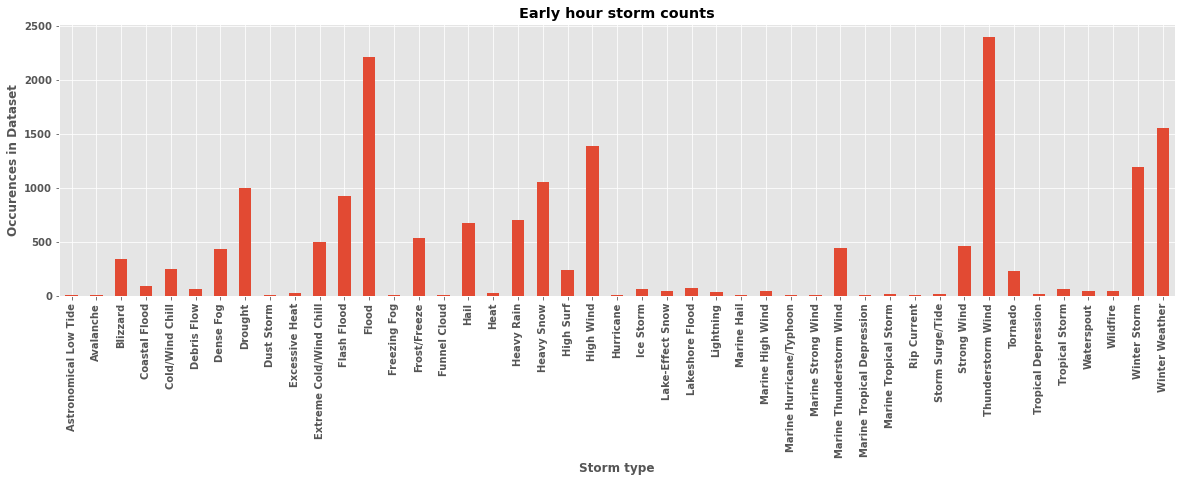

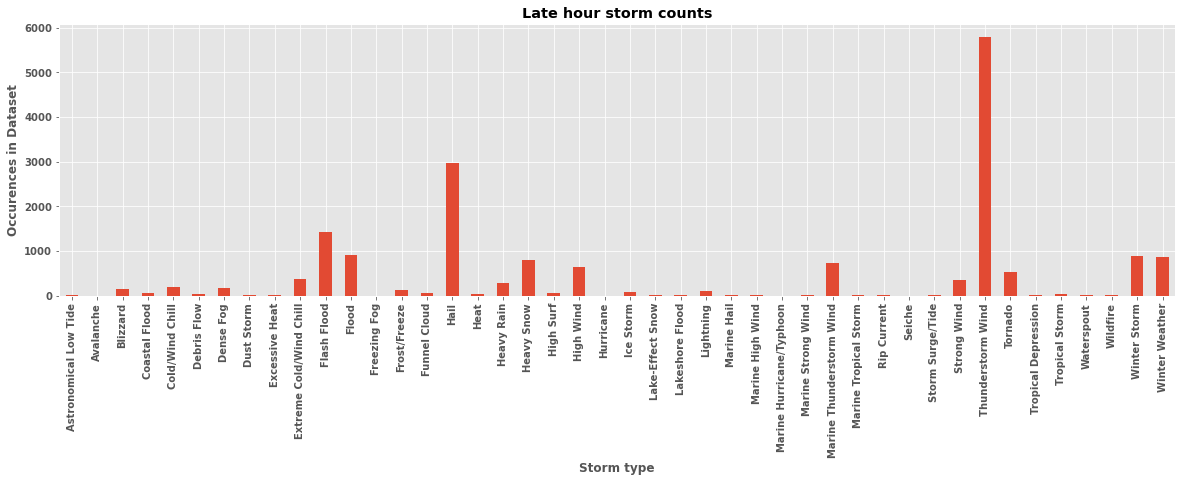

In [24]:
plt.figure(figsize=(20,5))
early_hours.groupby('EVENT_TYPE')['EVENT_TYPE'].count().plot(kind='bar')
plt.title('Early hour storm counts', fontweight='bold')
plt.ylabel('Occurences in Dataset', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Storm type", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()
plt.figure(figsize=(20,5))
late_hours.groupby('EVENT_TYPE')['EVENT_TYPE'].count().plot(kind='bar')
plt.title('Late hour storm counts', fontweight='bold')
plt.ylabel('Occurences in Dataset', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Storm type", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()